<a href="https://colab.research.google.com/github/egioia92/Machine-Learning/blob/main/Unsupervised%20Multivariate%20Methods/Prinicipal_Component_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prinicipal Component Analysis Assignment

BACKGROUND:

Birds belonging to different ecological groups have different appearances: flying birds have strong wings and wading birds have long legs. Their living habits are somewhat reflected in their bones' shapes.

As data scientists we may think of examining the underlying relationship between sizes of bones and ecological groups , and recognising birds' ecological groups by their bones' shapes.

Each bird is represented by 10 measurements (features):

Length and Diameter of Humerus

Length and Diameter of Ulna

Length and Diameter of Femur

Length and Diameter of Tibiotarsus

Length and Diameter of Tarsometatarsus

All measurements are continuous float numbers (mm). The skeletons of this dataset are collections of Natural History Museum of Los Angeles County. They belong to 21 orders, 153 genera, 245 species.

Each bird has a label for its ecological group:

SW: Swimming Birds

W: Wading Birds

T: Terrestrial Birds

R: Raptors

P: Scansorial Birds SO: Singing Birds

Source: This dataset is provided by Dr. D. Liu of Beijing Museum of Natural History.

In [ ]:
# @title Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
# @title Import ‘Bird’ data in R
bird_data = pd.read_csv("/content/Bird.csv")
bird_data.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [ ]:
# @title Summarise bird type using Principal Component Analysis. How many principal components are required to explain maximum variation in the data? Interpret the component.

# Separate features and labels
features = bird_data.iloc[:, :-1]
labels = bird_data.iloc[:, -1]

# Standardize features by scaling it
features_scaled = scale(features)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(features_scaled)

# Calculate the standard deviation of each principal component
SD = list(np.std(principal_components, axis=0))

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create a summary DataFrame with the results
summary = pd.DataFrame(list(zip(SD, explained_variance, cumulative_variance)), columns=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'])
print(summary)

# Determine number of components for maximum variation
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components required for 95% variance: {n_components}")

    Standard Deviation  Proportion of Variance  Cumulative Proportion
0             2.986136                0.810637               0.810637
1             0.900759                0.073761               0.884398
2             0.732408                0.048766               0.933163
3             0.623060                0.035291               0.968454
4             0.311241                0.008806               0.977261
5             0.300553                0.008212               0.985473
6             0.265420                0.006404               0.991877
7             0.189256                0.003256               0.995133
8             0.167567                0.002553               0.997686
9             0.135464                0.001668               0.999354
10            0.084281                0.000646               1.000000
Number of components required for 95% variance: 4


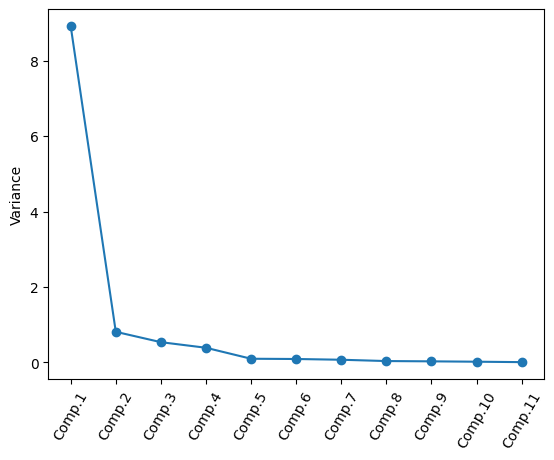

In [ ]:
y = np.std(pca.transform(features_scaled), axis=0)**2
x = np.arange(len(y)) + 1
plt.plot(x, y, "o-")
plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
plt.ylabel("Variance")
plt.show()

Observation :
First Principal Component explains 81% of the variation. The first two components capture approximately 88% of the total variance, and the first five components capture around 97%.

In [ ]:
# @title Store the principal component scores as a new variable.

# Create a DataFrame for PCA scores
pca_df = pd.DataFrame(principal_components[:, :n_components], columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['type'] = labels

pca_df.head()

,PC1,PC2,PC3,PC4,type
0,0.834906,-1.703558,0.192521,-0.762599,SW
1,1.935349,-1.158142,-0.426714,-0.751101,SW
2,1.383176,-1.246164,-0.547062,-0.723523,SW
3,0.923012,-1.337453,-0.551044,-0.712102,SW
4,0.038433,-1.421987,-0.666750,-0.796033,SW


In [ ]:
# @title Find average values of the new variable for each bird type and interpret the results.

# Calculate average PCA scores by bird type
avg_scores = pca_df.groupby('type').mean()

# Print results
print("Explained variance ratio:", explained_variance)
print("Cumulative variance:", cumulative_variance)
print(f"Number of components required for 95% variance: {n_components}")
print("\nAverage PCA scores by bird type:")
print(avg_scores)

Explained variance ratio: [8.10636875e-01 7.37606786e-02 4.87656527e-02 3.52912509e-02
 8.80642615e-03 8.21200667e-03 6.40433983e-03 3.25617850e-03
 2.55259856e-03 1.66823788e-03 6.45755187e-04]
Cumulative variance: [0.81063688 0.88439755 0.93316321 0.96845446 0.97726088 0.98547289
 0.99187723 0.99513341 0.99768601 0.99935424 1.        ]
Number of components required for 95% variance: 4

Average PCA scores by bird type:
           PC1       PC2       PC3       PC4
type                                        
P    -1.691456  0.076017  0.239882 -0.006081
R     2.321133  0.896633  0.403222 -0.281285
SO   -2.602650  0.539181  0.309107  0.260692
SW    2.067336 -0.931191 -0.304079 -0.033011
T     0.161321  0.255339  0.022184 -0.655208
W     0.501065 -0.166253 -0.500570  0.004782


<ipython-input-46-defe128fc288>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_scores, x='type', y='PC1', palette=colors)
<ipython-input-46-defe128fc288>:6: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(data=avg_scores, x='type', y='PC1', palette=colors)


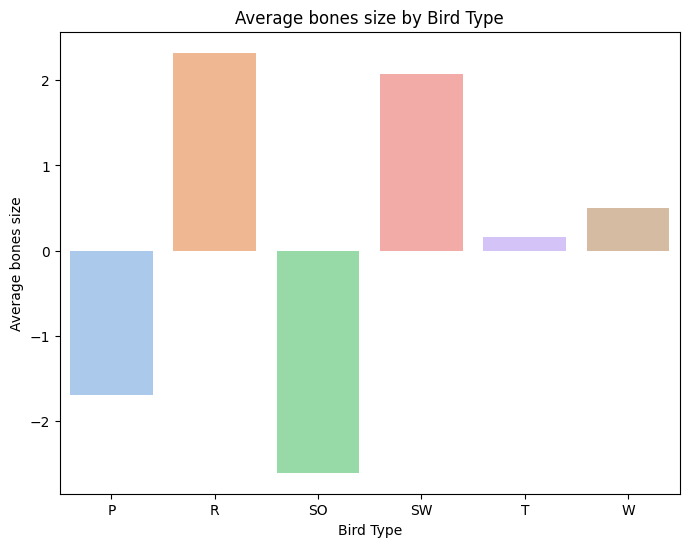

In [ ]:
colors = sns.color_palette("pastel")

# Create a bar graph using the specified color palette
plt.figure(figsize=(8, 6))
#Plotting bar graph
sns.barplot(data=avg_scores, x='type', y='PC1', palette=colors)
plt.title('Average bones size by Bird Type')
plt.xlabel('Bird Type')
plt.ylabel('Average bones size')
plt.xticks(rotation=0)
plt.show()

Observation :

PC1: Captures overall size or a generalized measure of robustness.

- High Positive Averages (Large Bone Size):
Raptors (R) and Swimming Birds (SW) show the largest positive averages.
This indicates that these bird types are associated with larger or more robust bone structures.

- High Negative Averages (Smaller Bone Size):
Singing Birds (SO) and Scansorial Birds (P) have strongly negative averages.
These bird types are smaller in size.

- Moderate Values:
Terrestrial Birds (T) and Wading Birds (W) exhibit moderate bone size averages.
